Credit Default Prediction

Libraries used-
NumPy,
Pandas,
Seaborn,
SciPy,
Scikit-learn

In [1]:
import numpy as np 
import pandas as pd 

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

**Import the Data

In [2]:
pd.set_option('max_columns', None)
df = pd.read_csv("/Users/mohit/Downloads/Case_Study_for_Moody's/credit/data.csv")

In [3]:
print(df.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')


Renaming the columns for clarity using Word file descriptions

In [4]:
df.rename(columns = {'X1':'Credit_Amt','X2':'Gender','X3':'Education','X4':'Marital_st','X5':'Age','X6':'RepaySt1','X7':'RepaySt2','X8':'RepaySt3','X9':'RepaySt4','X10':'RepaySt5','X11':'RepaySt6','X12':'BillSt1','X13':'BillSt2','X14':'BillSt3','X15':'BillSt4','X16':'BillSt5','X17':'BillSt6','X18':'PrevPay1','X19':'PrevPay2','X20':'PrevPay3','X21':'PrevPay4','X22':'PrevPay5','X23':'PrevPay6'}, inplace=True)

In [5]:
df.head()

,Credit_Amt,Gender,Education,Marital_st,Age,RepaySt1,RepaySt2,RepaySt3,RepaySt4,RepaySt5,RepaySt6,BillSt1,BillSt2,BillSt3,BillSt4,BillSt5,BillSt6,PrevPay1,PrevPay2,PrevPay3,PrevPay4,PrevPay5,PrevPay6,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.describe()

,Credit_Amt,Gender,Education,Marital_st,Age,RepaySt1,RepaySt2,RepaySt3,RepaySt4,RepaySt5,RepaySt6,BillSt1,BillSt2,BillSt3,BillSt4,BillSt5,BillSt6,PrevPay1,PrevPay2,PrevPay3,PrevPay4,PrevPay5,PrevPay6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Credit_Amt  30000 non-null  int64
 1   Gender      30000 non-null  int64
 2   Education   30000 non-null  int64
 3   Marital_st  30000 non-null  int64
 4   Age         30000 non-null  int64
 5   RepaySt1    30000 non-null  int64
 6   RepaySt2    30000 non-null  int64
 7   RepaySt3    30000 non-null  int64
 8   RepaySt4    30000 non-null  int64
 9   RepaySt5    30000 non-null  int64
 10  RepaySt6    30000 non-null  int64
 11  BillSt1     30000 non-null  int64
 12  BillSt2     30000 non-null  int64
 13  BillSt3     30000 non-null  int64
 14  BillSt4     30000 non-null  int64
 15  BillSt5     30000 non-null  int64
 16  BillSt6     30000 non-null  int64
 17  PrevPay1    30000 non-null  int64
 18  PrevPay2    30000 non-null  int64
 19  PrevPay3    30000 non-null  int64
 20  PrevPay4    30000 non-null  

**Checking for null values

In [8]:
df.isnull().sum()

Credit_Amt    0
Gender        0
Education     0
Marital_st    0
Age           0
RepaySt1      0
RepaySt2      0
RepaySt3      0
RepaySt4      0
RepaySt5      0
RepaySt6      0
BillSt1       0
BillSt2       0
BillSt3       0
BillSt4       0
BillSt5       0
BillSt6       0
PrevPay1      0
PrevPay2      0
PrevPay3      0
PrevPay4      0
PrevPay5      0
PrevPay6      0
Y             0
dtype: int64

In [9]:
print(df.apply(lambda col: col.unique()))

Credit_Amt    [20000, 120000, 90000, 50000, 500000, 100000, ...
Gender                                                   [2, 1]
Education                                 [2, 1, 3, 5, 4, 6, 0]
Marital_st                                         [1, 2, 3, 0]
Age           [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...
RepaySt1                    [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
RepaySt2                    [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
RepaySt3                    [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
RepaySt4                    [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
RepaySt5                       [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
RepaySt6                       [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
BillSt1       [3913, 2682, 29239, 46990, 8617, 64400, 367965...
BillSt2       [3102, 1725, 14027, 48233, 5670, 57069, 412023...
BillSt3       [689, 2682, 13559, 49291, 35835, 57608, 445007...
BillSt4       [0, 3272, 14331, 28314, 20940, 19394, 542653, ...
BillSt5       [0, 3455, 14948, 28959, 19

**Initial Cleaning

As we can see, Education & Marital Status have some values which are not described in Data Dictionary, so we just put them into others.

RepaySt1-6 also have -2 & -1 which are not described in data dictionary. I assume that these are payments in advance and do not change anything considering they are important variables.

In [10]:
df["Education"]= df["Education"].replace([0,5,6],4)
df["Marital_st"]= df["Marital_st"].replace([0],3)

**Initial Data Exploration

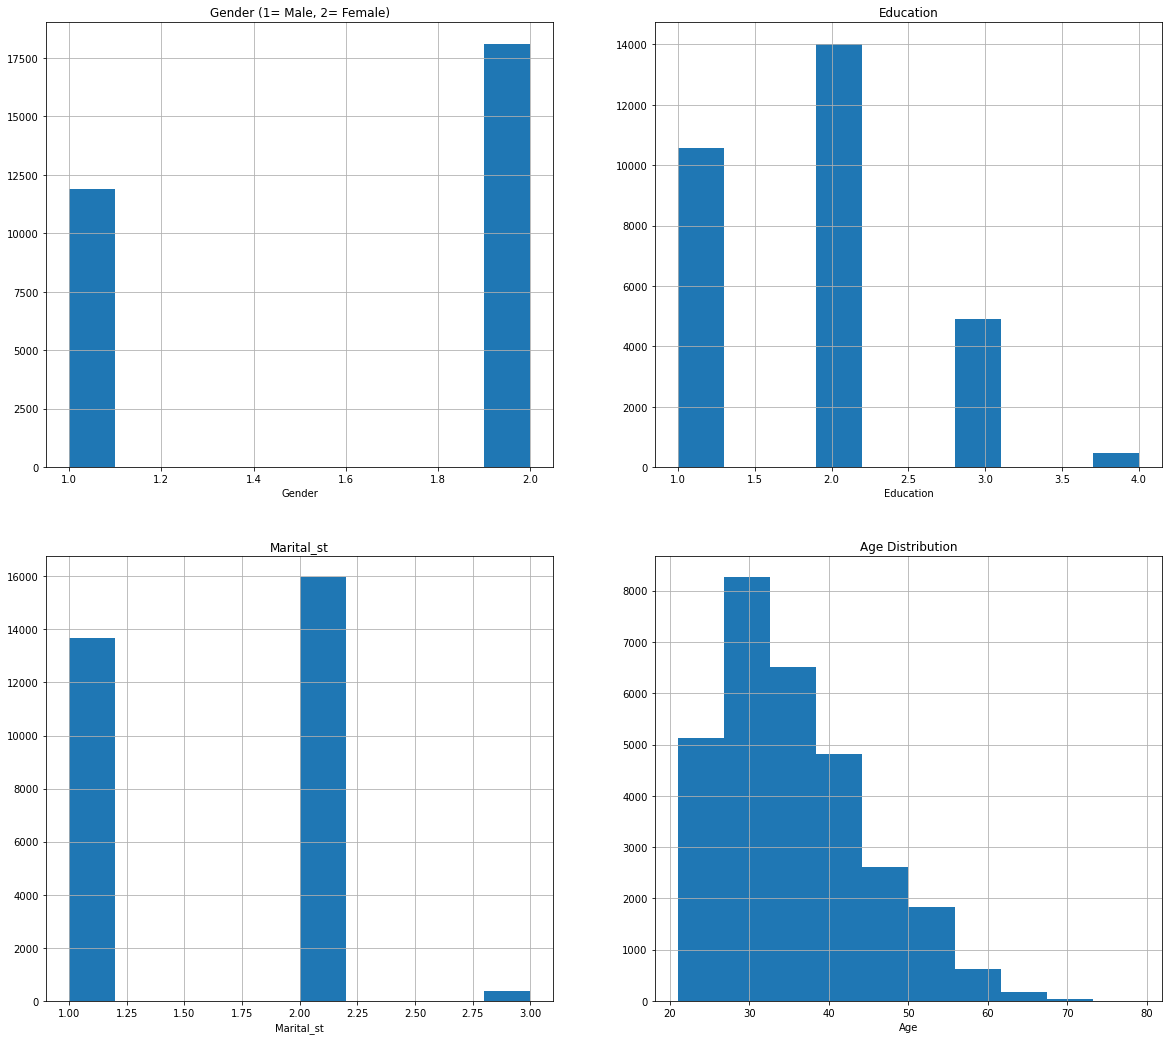

In [11]:
plt.subplots(figsize=(20,18))
plt.subplot(221)

df['Gender'].hist()
plt.xlabel('Gender')
plt.title('Gender (1= Male, 2= Female)')

plt.subplot(222)
df['Education'].hist()
plt.xlabel('Education')
plt.title('Education')

plt.subplot(223)
df['Marital_st'].hist()
plt.xlabel('Marital_st')
plt.title('Marital_st')

plt.subplot(224)
df['Age'].hist()
plt.xlabel('Age')
plt.title('Age Distribution')


plt.show()

In [12]:
df['age_cat'] = pd.cut(df['Age'], range(20, 80, 10), right=False)

**Plotting demographic features against Credit Default Status

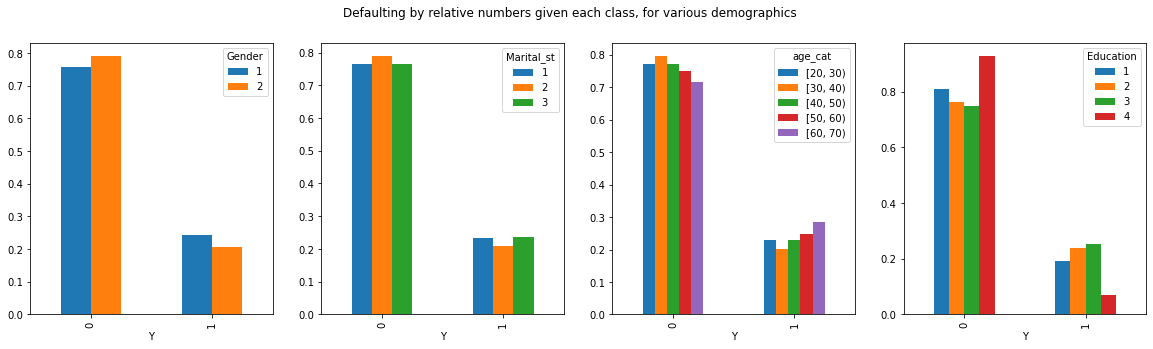

In [13]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = df.groupby(['Y', 'Gender']).size().unstack(level=1)
d = d / d.sum()
d.plot(kind='bar', ax=ax[0])

d = df.groupby(['Y', 'Marital_st']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['Y', 'age_cat']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

d = df.groupby(['Y', 'Education']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[3])

Nothing concrete can be said from this. Just that men & high school educated people are slightly more likely to default. But the differences are not high.

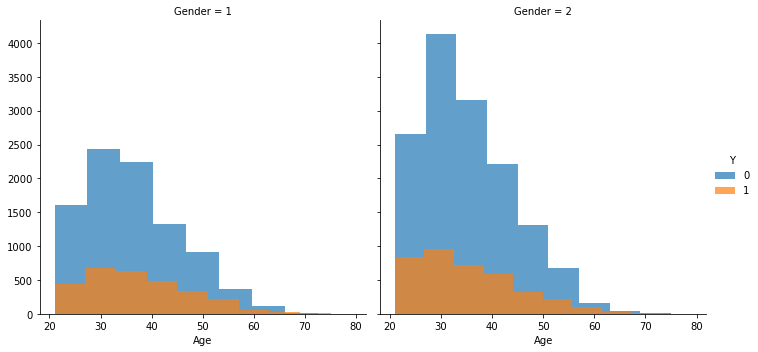

In [14]:
g = sns.FacetGrid(df, col='Gender', hue='Y', height=5)
g.map(plt.hist, 'Age', alpha=0.7, bins=9) 
g.add_legend()
plt.show()

Despite having much more number of women (Gender =2) in age group 30-40, number of defaulter are almost the same. Fair to say that menin age group 30-40 are likely to default more than women in same age group.

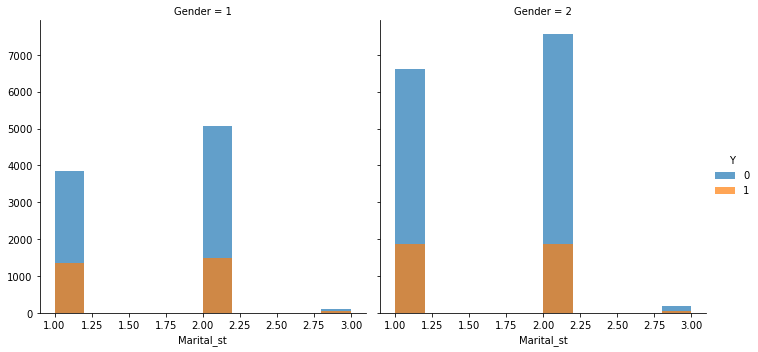

In [15]:
g = sns.FacetGrid(df, col='Gender', hue='Y', height=5)
g.map(plt.hist, 'Marital_st', alpha=0.7) 
g.add_legend()
plt.show()

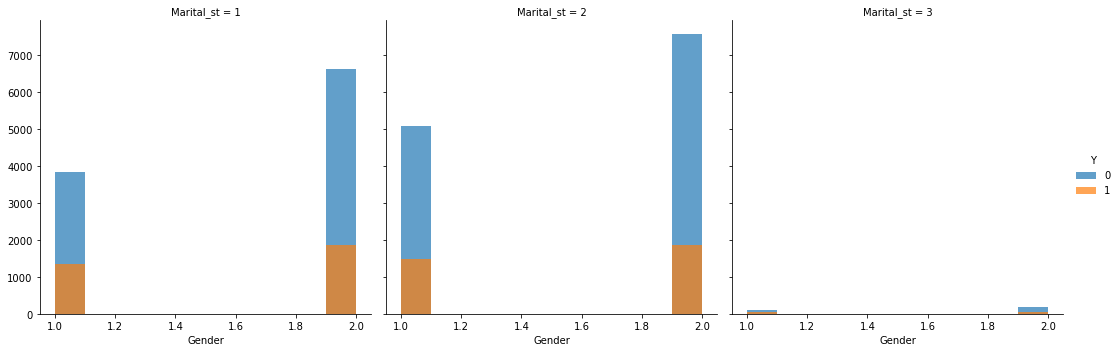

In [16]:
g = sns.FacetGrid(df, col='Marital_st', hue='Y', height=5)
g.map(plt.hist, 'Gender', alpha=0.7) 
g.add_legend()
plt.show()

Nothing much can be deduced from marital status just that men are more likely to default than women irrespective of marital status.

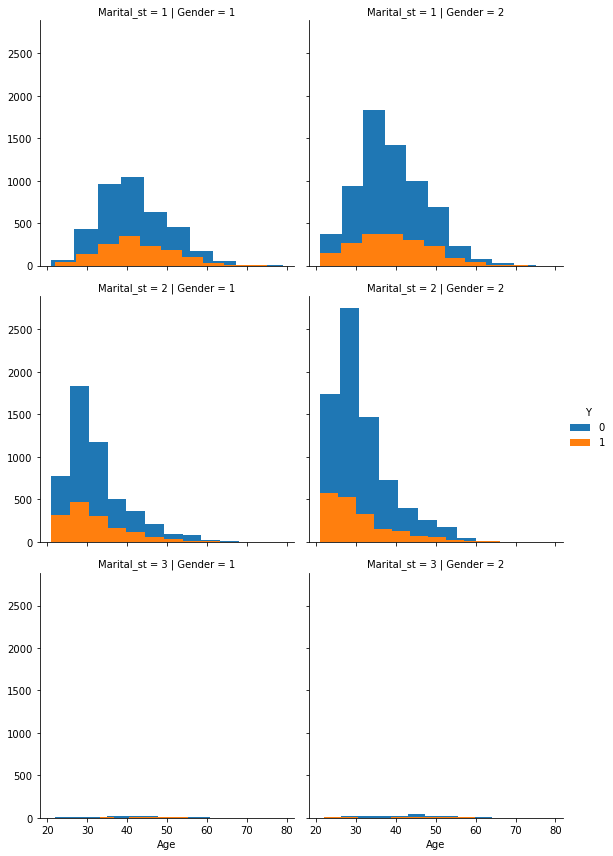

In [17]:
g = sns.FacetGrid(df, col='Gender', row='Marital_st', hue='Y', height=4)
g.map(plt.hist, 'Age',bins=10) 
g.add_legend()
plt.show()

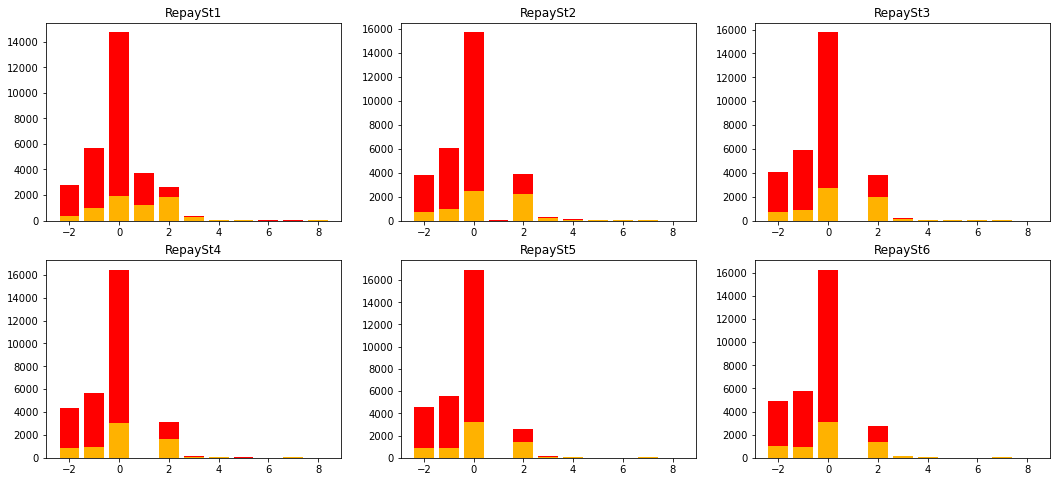

In [18]:
def cols(prefix):
    return [prefix+str(x) for x in range(1,7)]

repay_cols = cols('RepaySt')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(repay_cols)):
    row,col = int(i/3), i%3

    d  = df[repay_cols[i]].value_counts()
    x = df[repay_cols[i]][(df['Y']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(repay_cols[i])

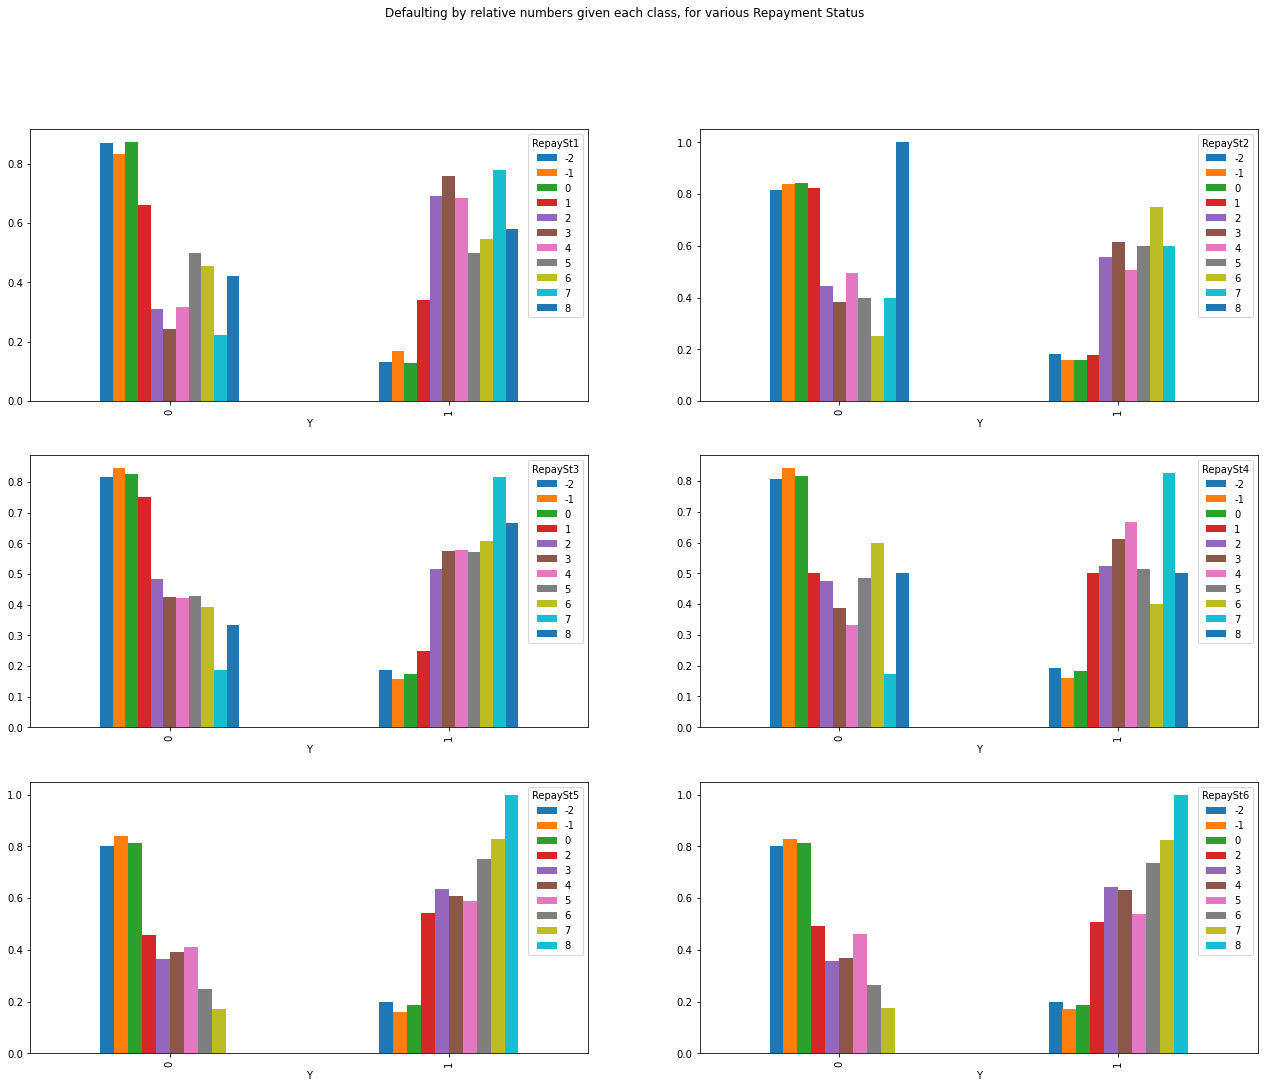

In [19]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(22,17)
fig.suptitle('Defaulting by relative numbers given each class, for various Repayment Status')

d = df.groupby(['Y', 'RepaySt1']).size().unstack(level=1)
d = d / d.sum()
d.plot(kind='bar', ax=ax[0,0])

d = df.groupby(['Y', 'RepaySt2']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0,1])

d = df.groupby(['Y', 'RepaySt3']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1,0])

d = df.groupby(['Y', 'RepaySt4']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1,1])

d = df.groupby(['Y', 'RepaySt5']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2,0])

d = df.groupby(['Y', 'RepaySt6']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2,1])

From these two Repayment Status plots, it is fair to say if in the first month i.e. April, if a person has payment delay for two months or more, then he's around 70% likely to default. But as we proceed to later months, people who have delays for more than six months are more likely to default.

In [20]:
correlation = df.corr()
correlation["Y"].sort_values(ascending=False)

Y             1.000000
RepaySt1      0.324794
RepaySt2      0.263551
RepaySt3      0.235253
RepaySt4      0.216614
RepaySt5      0.204149
RepaySt6      0.186866
Education     0.033842
Age           0.013890
BillSt6      -0.005372
BillSt5      -0.006760
BillSt4      -0.010156
BillSt3      -0.014076
BillSt2      -0.014193
BillSt1      -0.019644
Marital_st   -0.027575
Gender       -0.039961
PrevPay6     -0.053183
PrevPay5     -0.055124
PrevPay3     -0.056250
PrevPay4     -0.056827
PrevPay2     -0.058579
PrevPay1     -0.072929
Credit_Amt   -0.153520
Name: Y, dtype: float64

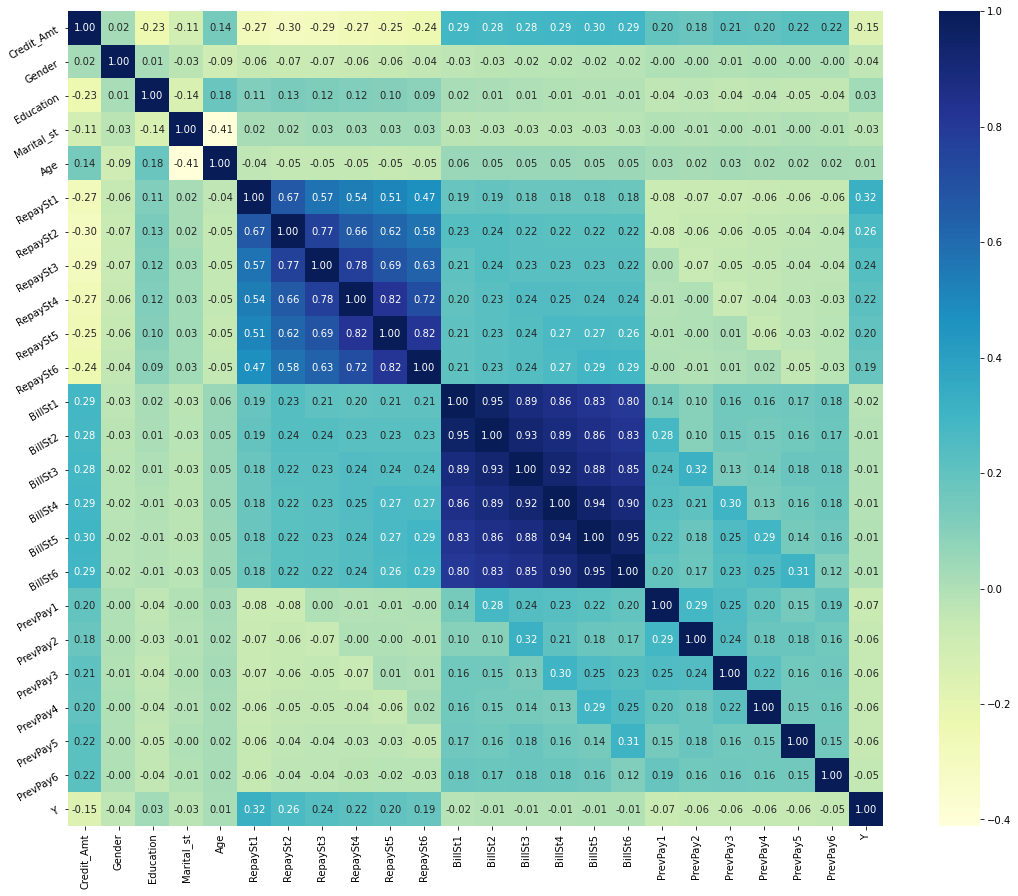

In [21]:
plt.figure(figsize=(20,15))
a = sns.heatmap(correlation, cmap='YlGnBu', square=True, annot=True, fmt='.2f', linecolor='green')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

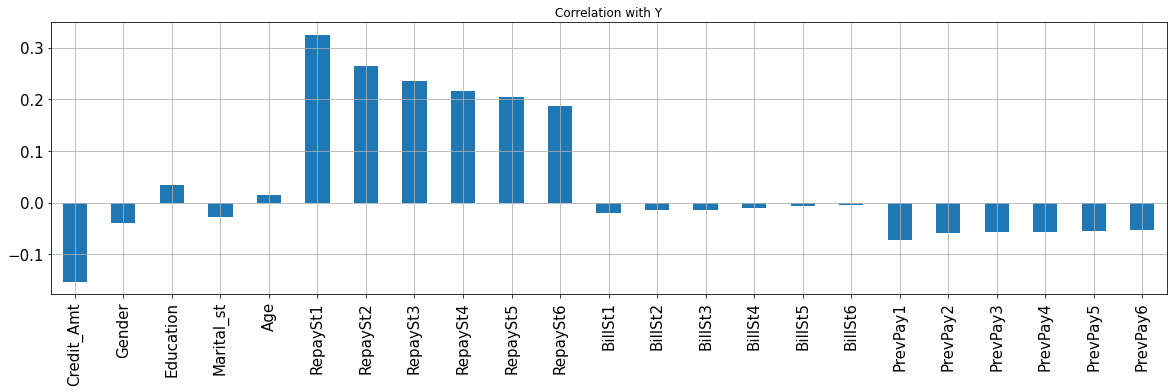

In [22]:
X = df.drop(['Y'],axis=1)
X.corrwith(df['Y']).plot.bar(figsize = (20, 5), title = "Correlation with Y", 
                                        fontsize = 15,rot = 90, grid = True)
plt.show()

One hot encoding: We need to create dummies of categorical variables which don't have levels in it for eg Gender. 1 or 2 doesn't mean higher or lower. It just means two different types.

In [23]:
df = pd.get_dummies(df,columns=["Gender","Education","Marital_st"])

In [24]:
df=df.drop(['age_cat'],axis=1)

In [25]:
print(df.columns)

Index(['Credit_Amt', 'Age', 'RepaySt1', 'RepaySt2', 'RepaySt3', 'RepaySt4',
       'RepaySt5', 'RepaySt6', 'BillSt1', 'BillSt2', 'BillSt3', 'BillSt4',
       'BillSt5', 'BillSt6', 'PrevPay1', 'PrevPay2', 'PrevPay3', 'PrevPay4',
       'PrevPay5', 'PrevPay6', 'Y', 'Gender_1', 'Gender_2', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Marital_st_1',
       'Marital_st_2', 'Marital_st_3'],
      dtype='object')


In [30]:
df=df.rename(columns = {'Gender_1':'Male','Gender_2':'Female','Education_1':'Grad_School','Education_2':'University','Education_3':'High_School','Education_4':'Others','Marital_st_1':'Married', 'Marital_st_2':'Single','Marital_st_3':'Others1'})

In [31]:
df

,Credit_Amt,Age,RepaySt1,RepaySt2,RepaySt3,RepaySt4,RepaySt5,RepaySt6,BillSt1,BillSt2,BillSt3,BillSt4,BillSt5,BillSt6,PrevPay1,PrevPay2,PrevPay3,PrevPay4,PrevPay5,PrevPay6,Y,Male,Female,Grad_School,University,High_School,Others,Married,Single,Others1
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,1,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,1,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,1,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,1,0,0,0,1,0,1,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,1,0,0,0,1,0,0,1,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,1,0,0,1,0,0,0,1,0
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,1,0,0,0,1,0,1,0,0


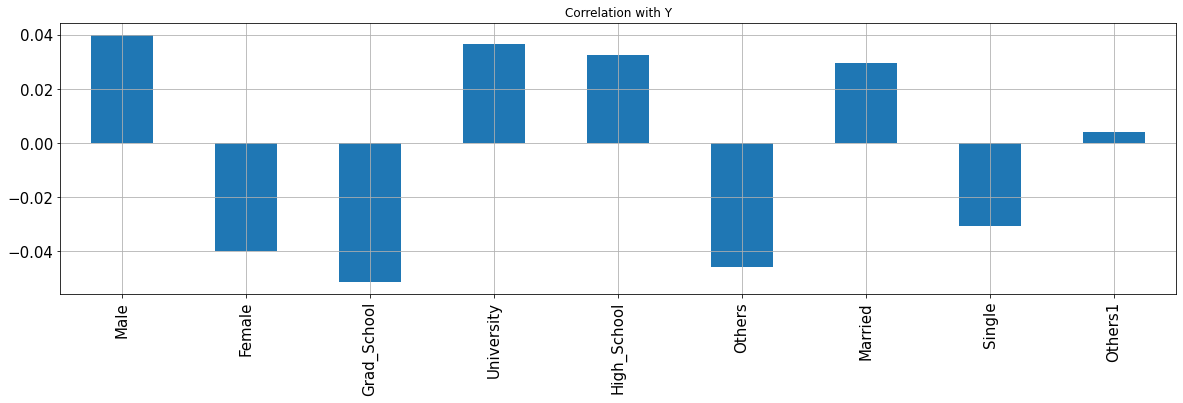

In [32]:
X1 = df[['Male','Female','Grad_School','University','High_School','Others','Married','Single','Others1']]
X1.corrwith(df['Y']).plot.bar(figsize = (20, 5), title = "Correlation with Y", 
                                        fontsize = 15,rot = 90, grid = True)
plt.show()

As we can see, demographic features have almost no correlation with default status. Only some relative remarks canbemade i.e. Men, married people are more likely to default than females & single people.

In [33]:
df_X = df.drop(['Y'], axis=1)
df_y = df.Y

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)


model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print('\nAccuracy Score for Logistic Regression: ', accuracy_score(y_pred,y_test))
scoresLR = cross_val_score( model1, X_train, y_train, cv=10)
print("Mean Logistic Regression CrossVal Accuracy on Train Set= %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))

scoresLR1 = cross_val_score( model1, X_test, y_test, cv=10)
print("Mean Logistic Regression CrossVal Accuracy on Test Set= %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5995
           1       0.00      0.40      0.00         5

    accuracy                           0.78      6000
   macro avg       0.50      0.59      0.44      6000
weighted avg       1.00      0.78      0.88      6000


Accuracy Score for Logistic Regression:  0.7803333333333333


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean Logistic Regression CrossVal Accuracy on Train Set= 0.78, with std=0.00


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean Logistic Regression CrossVal Accuracy on Test Set= 0.78, with std=0.00


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [34]:
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( X_train, y_train )
y_pred = classifier.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( classifier, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set= %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))
print(classification_report(y_pred, y_test))

Accuracy on Test Set for RandomForest = 0.81
Mean RandomForest CrossVal Accuracy on Train Set= 0.81, with std=0.01
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5327
           1       0.31      0.62      0.42       673

    accuracy                           0.81      6000
   macro avg       0.63      0.72      0.65      6000
weighted avg       0.87      0.81      0.83      6000



In [35]:
classifier1 = DecisionTreeClassifier(random_state=0)
classifier1.fit( X_train, y_train )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for DecisionTree = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean DecisionTree CrossVal Accuracy on Train Set= %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))
print(classification_report(y_pred, y_test))

Accuracy on Test Set for DecisionTree = 0.72
Mean DecisionTree CrossVal Accuracy on Train Set= 0.73, with std=0.01
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4576
           1       0.41      0.38      0.40      1424

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.72      0.72      0.72      6000



In [36]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier'],
    
    'Score': [0.78, 0.81, 0.72]
                    })

In [37]:
models

,Model,Score
0,Logistic Regression,0.78
1,Random Forest Classifier,0.81
2,Decision Tree Classifier,0.72


Logistic regression predicts 78% of the classifications right.

Random forest classifier predicts 81% of the classifications right.

Decision Tree classifier predicts 72% of the classifications right.